In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from skbio.stats.distance import mantel
import matplotlib.pyplot as plt

In [2]:
illumina_taxa = pd.read_csv('../illumina_Dan/final.minimap.cons.taxonomy', sep = '\t')
illumina_taxa = illumina_taxa[illumina_taxa['OTU'] != 'OTU1']
print(illumina_taxa.shape)
illumina_taxa.head()

(57332, 3)


,OTU,Size,Taxonomy
1,OTU2,5.0,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f...
2,OTU3,2.0,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;...
3,OTU4,1.0,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;...
4,OTU5,4.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
5,OTU6,44.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...


In [3]:
illumina_otus = pd.read_csv('../illumina_Dan/final.minimap.shared', sep = '\t')
illumina_otus = illumina_otus.drop('OTU1', axis = 1)
illumina_otus.set_index('group', inplace = True)
illumina_otus.drop(['label','numOtus'], axis = 1, inplace = True)
illumina_otus.columns = illumina_taxa['Taxonomy']
illumina_otus.index = illumina_otus.index + '_I'
illumina_otus = illumina_otus[(illumina_otus.index.str.contains('V')) & (illumina_otus.index.str.contains('Pro'))]
print(illumina_otus.shape)
illumina_otus.head()

(27, 57332)


Taxonomy,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f__unclassified;g__unclassified;s__unclassified;otu__gg_537776;,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;f__unclassified;g__unclassified;s__unclassified;otu__gg_1144154;,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;f__unclassified;g__unclassified;s__unclassified;otu__gg_816371;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_107234;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1122723;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1126596;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_143107;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_256858;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_427048;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362617;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4415327;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_520644;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_541793;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_674344;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_756593;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_809386;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_818353;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_823663;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_824583;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_95370;
group,,,,,,,,,,,,,,,,,,,,,
ARD-V-Pro-85E-1_I,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ARD-V-Pro-85E-2_I,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARD-V-Pro-85E-3_I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARD-V-Pro-86E-1_I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARD-V-Pro-86E-2_I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
minion_full_barcodes = pd.read_csv('../barcodes.csv', index_col=0)
minion_full_barcodes = minion_full_barcodes[minion_full_barcodes.index != 'barcode18']
print(minion_full_barcodes.shape)
minion_full_barcodes.head()

(85, 5)


,Library,Site,Plot,Rep,group
sample_name,,,,,
barcode01,Library1,ARDEC,85E,RepA,ARD_85E_Library1_A
barcode02,Library1,ARDEC,85E,RepB,ARD_85E_Library1_B
barcode03,Library1,ARDEC,85E,RepC,ARD_85E_Library1_C
barcode04,Library1,ARDEC,86E,RepA,ARD_86E_Library1_A
barcode05,Library2,ARDEC,85E,RepA,ARD_85E_Library2_A


In [5]:
minion_full_taxa = pd.read_csv('../minion_Dan/minimap/final.minimap.cons.taxonomy', sep = '\t')
minion_full_taxa = minion_full_taxa[minion_full_taxa['OTU'] != 'OTU1']
minion_full_taxa

,OTU,Size,Taxonomy
1,OTU2,4.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
2,OTU3,112.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
3,OTU4,1.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
4,OTU5,1.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
5,OTU6,4.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
...,...,...,...
58286,OTU58287,4.0,k__Bacteria;p__unclassified;c__unclassified;o_...
58287,OTU58288,1.0,k__Bacteria;p__unclassified;c__unclassified;o_...
58288,OTU58289,1.0,k__Bacteria;p__unclassified;c__unclassified;o_...
58289,OTU58290,3.0,k__Bacteria;p__unclassified;c__unclassified;o_...


In [6]:
minion_full_otus = pd.read_csv('../minion_Dan/minimap/final.minimap.shared', sep = '\t')
minion_full_otus = minion_full_otus.drop('OTU1', axis = 1)
minion_full_otus = minion_full_otus[minion_full_otus['group'] != 'barcode18']
minion_full_otus = minion_full_otus[minion_full_otus['group'].isin(minion_full_barcodes.index)]
minion_full_otus['group'] = minion_full_barcodes['group'].values
minion_full_otus.drop(['label','numOtus'], axis = 1, inplace = True)
minion_full_otus['group'] = minion_full_otus['group'] + '_MF'
minion_full_otus.set_index('group', inplace = True)
minion_full_otus.columns = minion_full_taxa['Taxonomy']
minion_full_otus = minion_full_otus[minion_full_otus.index.str.contains('Library3')]
print(minion_full_otus.shape)
minion_full_otus.head()

(29, 58290)


Taxonomy,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__Korarchaeotaceae;g__unclassified;s__unclassified;otu__gg_142245;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__unclassified;g__unclassified;s__unclassified;otu__gg_142513;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__unclassified;g__unclassified;s__unclassified;otu__gg_144658;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__pJP78;f__unclassified;g__unclassified;s__unclassified;otu__gg_144656;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__pJP78;f__unclassified;g__unclassified;s__unclassified;otu__gg_159805;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__pJP78;f__unclassified;g__unclassified;s__unclassified;otu__gg_811072;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1019;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_250053;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_3240665;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_564250;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4363374;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4479190;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_520644;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_534023;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_562348;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_625188;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_653625;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_756593;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_818353;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_824583;
group,,,,,,,,,,,,,,,,,,,,,
ARD_85E_Library3_A_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ARD_85E_Library3_B_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARD_85E_Library3_C_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ARD_86E_Library3_A_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARD_86E_Library3_B_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
minion_short_barcodes = pd.read_csv('../minion_Illumina_primers_Dan/barcodes_Illumina_minion.csv', index_col=0)
minion_short_barcodes['Barcode'] = ['barcode' + str(x).zfill(2) for x in minion_short_barcodes['Barcode']]
minion_short_barcodes['group'] = minion_short_barcodes.index
print(minion_short_barcodes.shape)
minion_short_barcodes.head()

(30, 2)


,Barcode,group
Sample,,
ARD-V-Pro-85E-1,barcode01,ARD-V-Pro-85E-1
ARD-V-Pro-85E-2,barcode02,ARD-V-Pro-85E-2
ARD-V-Pro-85E-3,barcode03,ARD-V-Pro-85E-3
ARD-V-Pro-86E-1,barcode04,ARD-V-Pro-86E-1
ARD-V-Pro-86E-2,barcode05,ARD-V-Pro-86E-2


In [8]:
minion_short_taxa = pd.read_csv('../minion_Illumina_primers_Dan/final.minimap.cons.taxonomy', sep = '\t')
minion_short_taxa = minion_short_taxa[minion_short_taxa['OTU'] != 'OTU1']
print(minion_short_taxa.shape)
minion_short_taxa.head()

(53031, 3)


,OTU,Size,Taxonomy
1,OTU2,13.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
2,OTU3,4.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
3,OTU4,8.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
4,OTU5,7.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
5,OTU6,6.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...


In [9]:
minion_short_otus = pd.read_csv('../minion_Illumina_primers_Dan/final.minimap.shared', sep = '\t')
minion_short_otus.drop('OTU1', axis = 1, inplace = True)
minion_short_otus = minion_short_otus[minion_short_otus['group'].isin(minion_short_barcodes['Barcode'])]
minion_short_barcodes = minion_short_barcodes[minion_short_barcodes['Barcode'].isin(minion_short_otus['group'])]
minion_short_otus['group'] = minion_short_barcodes.index.values
minion_short_otus.drop(['label','numOtus'], axis = 1, inplace = True)
minion_short_otus['group'] = minion_short_otus['group'] + '_MI'
minion_short_otus.set_index('group', inplace = True)
minion_short_otus.columns = minion_short_taxa['Taxonomy']
print(minion_short_otus.shape)
minion_short_otus.head()

(29, 53031)


Taxonomy,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1122723;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_143107;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_427048;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362617;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362618;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_543169;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_572813;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_71074;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_716787;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1170;otu__gg_101071;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4407785;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_520644;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_562348;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_653625;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_669210;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_674344;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_756593;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_818353;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_823663;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_824583;
group,,,,,,,,,,,,,,,,,,,,,
ARD-V-Pro-85E-1_MI,1,0,0,0,1,0,0,1,0,3,...,0,0,0,0,0,0,0,0,1,0
ARD-V-Pro-85E-2_MI,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,1,0,0,0
ARD-V-Pro-85E-3_MI,0,0,0,1,0,0,0,0,0,2,...,0,1,0,0,0,1,0,0,0,0
ARD-V-Pro-86E-1_MI,1,0,0,1,0,0,0,0,0,8,...,0,0,0,0,0,1,0,0,1,0
ARD-V-Pro-86E-2_MI,2,0,0,0,0,0,0,0,0,3,...,0,0,1,0,0,1,0,0,0,0


In [10]:
dada2_taxa = pd.read_csv('../illumina_Dan/dada.cons.taxonomy', sep = '\t')
print(dada2_taxa.shape)
dada2_taxa.head()

(11336, 3)


,OTU,Seq,Taxonomy
0,OTU1,TGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCGACGCCGC...,k__Bacteria;p__Actinobacteria;c__Actinobacteri...
1,OTU2,TGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGC...,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
2,OTU3,TGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCAACGCCGC...,k__Bacteria;p__Actinobacteria;c__Actinobacteri...
3,OTU4,CAAGGAATCTTCCGCAATGGGGGCAACCCTGACGGAGCAACGCCGC...,k__unclassified;p__unclassified;c__unclassifie...
4,OTU5,TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCGACGCCGC...,k__Bacteria;p__Actinobacteria;c__Actinobacteri...


In [11]:
dada2_otus = pd.read_csv('../illumina_Dan/dada.shared', sep = '\t')
dada2_otus.set_index('group', inplace = True)
dada2_otus.drop(['label','numOtus'], axis = 1, inplace = True)
dada2_otus.columns = dada2_taxa['Taxonomy']
dada2_otus.index = dada2_otus.index + '_D'
dada2_otus_t = dada2_otus.T
dada2_otus_t['Taxa'] = dada2_otus_t.index
dada2_otus_t = dada2_otus_t.groupby('Taxa').sum()
dada2_otus = dada2_otus_t.T
# dada2_otus = dada2_otus[(dada2_otus.index.str.contains('V')) & (dada2_otus.index.str.contains('Pro'))]
print(dada2_otus.shape)
dada2_otus.head()

(105, 2906)


Taxa,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1133685;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1902950;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2068084;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4044206;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4314636;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4328498;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4329542;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4339223;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_44004;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_512534;,...,k__Bacteria;p__WPS-2;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_797182;,k__Bacteria;p__WS2;c__SHA-109;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_136216;,k__Bacteria;p__WS2;c__SHA-109;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2065775;,k__Bacteria;p__WS2;c__SHA-109;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4477112;,k__Bacteria;p__WS2;c__SHA-109;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_65677;,k__Bacteria;p__WS3;c__PRR-12;o__LD1-PA13;f__unclassified;g__unclassified;s__unclassified;otu__gg_808847;,k__Bacteria;p__WS3;c__PRR-12;o__Sediment-1;f__unclassified;g__unclassified;s__unclassified;otu__gg_1128107;,k__Bacteria;p__WS3;c__PRR-12;o__Sediment-1;f__unclassified;g__unclassified;s__unclassified;otu__gg_113334;,k__Bacteria;p__WS3;c__PRR-12;o__Sediment-1;f__unclassified;g__unclassified;s__unclassified;otu__gg_4336217;,k__unclassified;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__unclassified;
group,,,,,,,,,,,,,,,,,,,,,
ARD-T-Pow-85E-1_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,2738
ARD-T-Pow-85E-2_D,24,0,0,0,22,0,0,0,0,0,...,0,0,0,0,0,0,0,9,111,10288
ARD-T-Pow-85E-3_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,7471
ARD-T-Pow-86E-1_D,0,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,67,8292
ARD-T-Pow-86E-2_D,0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,0,25,0,0,86,10793


In [12]:
full_otu_df = pd.concat([illumina_otus, minion_short_otus, minion_full_otus]).fillna(0)
samples = []
for i in full_otu_df.index:
    if ('Cal' in i) or ('H2' in i) or ('Zymo' in i):
        print(i)
        pass
    elif ('ARD' in i) or ('Pen' in i):
        samples.append(i)
full_otu_df = full_otu_df[full_otu_df.index.isin(samples)]
low_reads_df = pd.DataFrame(full_otu_df.sum(axis = 1))
low_reads = low_reads_df[low_reads_df[0] < 500].index
full_otu_df = full_otu_df[~full_otu_df.index.isin(low_reads)]
print(len(low_reads))
print(full_otu_df.shape)
full_otu_df.head()

H20-Neg-V-Pro-1_I
H20-Neg-V-Pro-2_I
H20-Neg-V-Pro-3_I
H20-Neg-V-Pro-1_MI
H20-Neg-V-Pro-2_MI
H20-Neg-V-Pro-3_MI
Zymo-ARD_MI
PCR1H2O_MI
4
(68, 76627)


,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f__unclassified;g__unclassified;s__unclassified;otu__gg_537776;,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;f__unclassified;g__unclassified;s__unclassified;otu__gg_1144154;,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;f__unclassified;g__unclassified;s__unclassified;otu__gg_816371;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_107234;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1122723;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1126596;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_143107;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_256858;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_427048;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362617;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2093839;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2155258;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_260036;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_262307;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_3291002;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4335289;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4363374;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4479190;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_534023;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_625188;
group,,,,,,,,,,,,,,,,,,,,,
ARD-V-Pro-85E-1_I,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-85E-2_I,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-85E-3_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-86E-1_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-86E-2_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
low_reads

Index(['ARD-V-Pro-89A-3_MI', 'Pen-V-Pro-4-1_MI', 'Pen-V-Pro-4-2_MI',
       'Pen-V-Pro-4-3_MI'],
      dtype='object', name='group')

In [20]:
full_bc = beta_diversity('braycurtis', full_otu_df, full_otu_df.index)
full_pc = pcoa(full_bc)

In [21]:
site = []
samples = []
for i in full_otu_df.index:
    samples.append(i)
    if 'ARD' in i:
        site.append('ARD')
    elif 'Pen' in i:
        site.append('Pen')
    else:
        site.append('None')
mapping_file = pd.DataFrame({'Sample':samples, 'Site':site, 'Study': [x.split('_')[-1] for x in full_otu_df.index]})
mapping_file['Site_study'] = mapping_file['Site'] + '_' + mapping_file['Study']

In [22]:
plotting_df = mapping_file.copy()
plotting_df['PCA1_bc'] = full_pc.samples['PC1'].values
plotting_df['PCA2_bc'] = full_pc.samples['PC2'].values
plotting_df['PCA3_bc'] = full_pc.samples['PC3'].values

In [23]:
treatment_perm = permanova(full_bc, plotting_df['Study'].values, permutations=999)
treatment_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      68
number of groups                  3
test statistic              10.4573
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

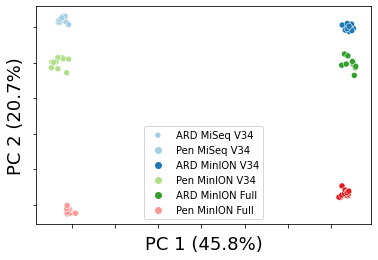

In [25]:
# without filtering
ax = sns.scatterplot(x = 'PCA1_bc', y = 'PCA2_bc', hue = 'Site_study', data = plotting_df, palette = 'Paired')
# for i, txt in enumerate(plotting_df['Sample']):
#     ax.text(plotting_df['PCA1_bc'][i], plotting_df['PCA2_bc'][i], txt)
ax.legend(scatterpoints=1, bbox_to_anchor=(1, 1), loc='upper left', fontsize = 18)
ax.set_xlabel('PC %d (%.1f%%)' % (1, full_pc.proportion_explained[0]*100), size=18)
ax.set_ylabel('PC %d (%.1f%%)' % (2, full_pc.proportion_explained[1]*100), size=18)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.gca().invert_yaxis()
ax.legend(labels=['ARD MiSeq V34', 'Pen MiSeq V34', 'ARD MinION V34', 'Pen MinION V34', 'ARD MinION Full', 'Pen MinION Full'])
plt.savefig('../Figures/ordination_all_otus_unfiltered.jpg', bbox_inches = 'tight', dpi = 300)

In [16]:
def filter_percent_sample_threshold(df, threshold):
    for index, row in df.iterrows():
        total_count = sum(row)
        threshold_value = total_count*threshold
        df.loc[index] = row[row > threshold_value]
    return df.fillna(0)

In [17]:
start = time.time()
full_otu_df_filtered = filter_percent_sample_threshold(full_otu_df.copy(), 0.0001)
end = time.time()
print(end - start)

66.64208626747131


In [18]:
print(full_otu_df_filtered.shape)
print(full_otu_df.shape)

(68, 76627)
(68, 76627)


In [19]:
((full_otu_df.sum(axis = 1).sum()) - full_otu_df_filtered.sum(axis = 1).sum())/(full_otu_df.sum(axis = 1).sum())

0.30601473779245564

<AxesSubplot:xlabel='ARD-V-Pro-85E-1_I', ylabel='Count'>

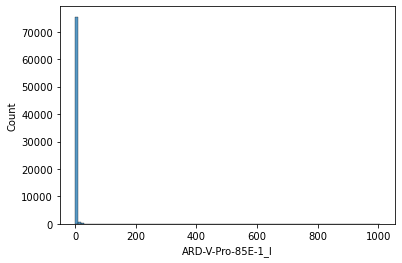

In [20]:
sns.histplot(full_otu_df.iloc[0], bins = 100)

In [21]:
full_otu_df[full_otu_df > 0].count(axis = 1)

group
ARD-V-Pro-85E-1_I           9940
ARD-V-Pro-85E-2_I           9943
ARD-V-Pro-85E-3_I          11903
ARD-V-Pro-86E-1_I          10581
ARD-V-Pro-86E-2_I          10040
                           ...  
Pen_Plot3_Library3_B_MF    12823
Pen_Plot3_Library3_C_MF    14031
Pen_Plot4_Library3_A_MF    13438
Pen_Plot4_Library3_B_MF    12624
Pen_Plot4_Library3_C_MF    13504
Length: 68, dtype: int64

In [22]:
full_otu_df_filtered[full_otu_df_filtered > 0].count(axis = 1)

group
ARD-V-Pro-85E-1_I          1795
ARD-V-Pro-85E-2_I          1714
ARD-V-Pro-85E-3_I          1738
ARD-V-Pro-86E-1_I          1785
ARD-V-Pro-86E-2_I          1612
                           ... 
Pen_Plot3_Library3_B_MF    2269
Pen_Plot3_Library3_C_MF    2081
Pen_Plot4_Library3_A_MF    2379
Pen_Plot4_Library3_B_MF    2207
Pen_Plot4_Library3_C_MF    2217
Length: 68, dtype: int64

In [23]:
full_otu_df_filtered.sum(axis = 1)

group
ARD-V-Pro-85E-1_I          48714.0
ARD-V-Pro-85E-2_I          44190.0
ARD-V-Pro-85E-3_I          68525.0
ARD-V-Pro-86E-1_I          59266.0
ARD-V-Pro-86E-2_I          53754.0
                            ...   
Pen_Plot3_Library3_B_MF    44859.0
Pen_Plot3_Library3_C_MF    53144.0
Pen_Plot4_Library3_A_MF    46118.0
Pen_Plot4_Library3_B_MF    41868.0
Pen_Plot4_Library3_C_MF    50462.0
Length: 68, dtype: float64

In [24]:
full_bc_filtered = beta_diversity('braycurtis', full_otu_df_filtered, full_otu_df_filtered.index)
full_pc_filtered = pcoa(full_bc_filtered)

In [25]:
plotting_df_filtered = mapping_file.copy()
plotting_df_filtered['PCA1_bc'] = full_pc_filtered.samples['PC1'].values
plotting_df_filtered['PCA2_bc'] = full_pc_filtered.samples['PC2'].values
plotting_df_filtered['PCA3_bc'] = full_pc_filtered.samples['PC3'].values

In [26]:
treatment_perm_filtered = permanova(full_bc, plotting_df['Study'].values, permutations=999)
treatment_perm_filtered

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      68
number of groups                  3
test statistic              10.4573
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

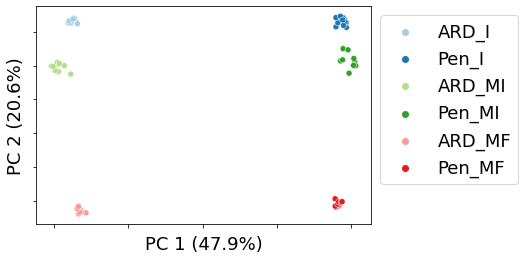

In [27]:
# with filtering
ax = sns.scatterplot(x = 'PCA1_bc', y = 'PCA2_bc', hue = 'Site_study', data = plotting_df_filtered, palette = 'Paired')
# for i, txt in enumerate(plotting_df['Sample']):
#     ax.text(plotting_df['PCA1_bc'][i], plotting_df['PCA2_bc'][i], txt)
ax.legend(scatterpoints=1, bbox_to_anchor=(1, 1), loc='upper left', fontsize = 18)
ax.set_xlabel('PC %d (%.1f%%)' % (1, full_pc_filtered.proportion_explained[0]*100), size=18)
ax.set_ylabel('PC %d (%.1f%%)' % (2, full_pc_filtered.proportion_explained[1]*100), size=18)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.gca().invert_yaxis()
# plt.savefig('../Figures/ordination_all_otus_filtered.jpg', bbox_inches = 'tight', dpi = 300)

In [28]:
coeff, p_value, n = mantel(full_bc, full_bc_filtered)
print(coeff, p_value)

0.9972517320439623 0.001


In [265]:
def group_species(full_alpha_filtered_species, level):
    if level == 'species':
        full_alpha_filtered_species.columns = [x.split('otu')[0] for x in full_alpha_filtered_species.columns]
    elif level == 'genus':
        full_alpha_filtered_species.columns = [';'.join(x.split(';')[:-3]) + ';' for x in full_alpha_filtered_species.columns]
    else:
        print('Error')
    full_alpha_filtered_species.reset_index(inplace = True)
    full_alpha_filtered_species_melted = full_alpha_filtered_species.melt(id_vars = 'group')
    full_alpha_filtered_species_melted = full_alpha_filtered_species_melted.groupby(['group', 'variable']).sum()
    full_alpha_filtered_species_melted.reset_index(inplace = True)
    df_index = full_alpha_filtered_species_melted.groupby('group', sort=False).sum().index
    df_columns = full_alpha_filtered_species_melted[full_alpha_filtered_species_melted['group'] == 'ARD-T-Pow-85E-1_I']['variable']
    full_alpha_filtered_species_melted_reshaped = pd.DataFrame(index = df_index, columns = df_columns)

    for h in df_index:
        for k in df_columns:
            if k in full_alpha_filtered_species_melted[full_alpha_filtered_species_melted['group']== h]['variable'].values:
                full_alpha_filtered_species_melted_reshaped.loc[h,k] = full_alpha_filtered_species_melted[(full_alpha_filtered_species_melted['group'] == h) & (full_alpha_filtered_species_melted['variable'] == k)]['value'].values[0]
            else:
                full_alpha_filtered_species_melted_reshaped.loc[i,j] = 0
    return full_alpha_filtered_species_melted_reshaped

In [281]:
# full_otu_df_genus = group_species(full_otu_df.copy(), 'genus')
# full_otu_df_genus.to_csv('../Tables/full_otu_genus.csv')
full_otu_df_genus = pd.read_csv('../Tables/full_otu_genus.csv', index_col=0)
full_otu_df_genus.head()

,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__Korarchaeotaceae;g__unclassified;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__pJP78;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__MCG;o__unclassified;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__THSCG;o__unclassified;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Aeropyrum;,...,k__Bacteria;p__WS6;c__SC72;o__A-2AF;f__unclassified;g__unclassified;,k__Bacteria;p__WS6;c__SC72;o__WCHB1-15;f__unclassified;g__unclassified;,k__Bacteria;p__WS6;c__SC72;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__WS6;c__unclassified;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__WWE1;c__Cloacamonae;o__Cloacamonales;f__Cloacamonaceae;g__Candidatus_Cloacamonas;,k__Bacteria;p__WWE1;c__Cloacamonae;o__Cloacamonales;f__Cloacamonaceae;g__W22;,k__Bacteria;p__WWE1;c__MSBL2;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__ZB3;c__BS119;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__ZB3;c__unclassified;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;
group,,,,,,,,,,,,,,,,,,,,,
ARD-T-Pow-85E-1_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
ARD-T-Pow-85E-2_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
ARD-T-Pow-85E-3_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
ARD-T-Pow-86E-1_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
ARD-T-Pow-86E-2_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0


In [267]:
full_bc_genus = beta_diversity('braycurtis', full_otu_df_genus, full_otu_df_genus.index)
full_pc_genus = pcoa(full_bc_genus)

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.08889094084648062 and the largest is 8.084268768585433.
  RuntimeWarning


In [268]:
plotting_df_genus = mapping_file.copy()
plotting_df_genus['PCA1_bc'] = full_pc_genus.samples['PC1'].values
plotting_df_genus['PCA2_bc'] = full_pc_genus.samples['PC2'].values
plotting_df_genus['PCA3_bc'] = full_pc_genus.samples['PC3'].values

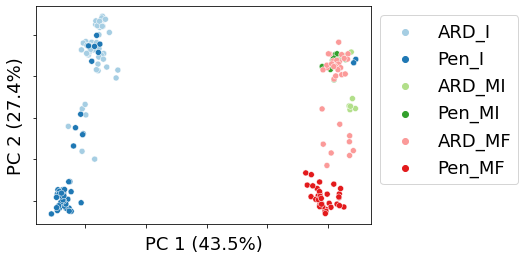

In [269]:
# without filtering, genus
ax = sns.scatterplot(x = 'PCA1_bc', y = 'PCA2_bc', hue = 'Site_study', data = plotting_df_genus, palette = 'Paired')
# for i, txt in enumerate(plotting_df['Sample']):
#     ax.text(plotting_df['PCA1_bc'][i], plotting_df['PCA2_bc'][i], txt)
ax.legend(scatterpoints=1, bbox_to_anchor=(1, 1), loc='upper left', fontsize = 18)
ax.set_xlabel('PC %d (%.1f%%)' % (1, full_pc_genus.proportion_explained[0]*100), size=18)
ax.set_ylabel('PC %d (%.1f%%)' % (2, full_pc_genus.proportion_explained[1]*100), size=18)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.gca().invert_yaxis()

In [273]:
full_otu_df_species = group_species(full_otu_df.copy(), 'species')

In [274]:
full_otu_df_species.to_csv('../Tables/full_otu_species.csv')

In [275]:
full_bc_species = beta_diversity('braycurtis', full_otu_df_species, full_otu_df_species.index)
full_pc_species = pcoa(full_bc_species)

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.08686712031445805 and the largest is 8.151701721411357.
  RuntimeWarning


In [276]:
plotting_df_species = mapping_file.copy()
plotting_df_species['PCA1_bc'] = full_pc_species.samples['PC1'].values
plotting_df_species['PCA2_bc'] = full_pc_species.samples['PC2'].values
plotting_df_species['PCA3_bc'] = full_pc_species.samples['PC3'].values

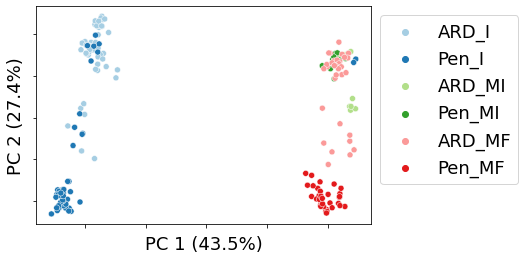

In [277]:
# without filtering, genus
ax = sns.scatterplot(x = 'PCA1_bc', y = 'PCA2_bc', hue = 'Site_study', data = plotting_df_species, palette = 'Paired')
# for i, txt in enumerate(plotting_df['Sample']):
#     ax.text(plotting_df['PCA1_bc'][i], plotting_df['PCA2_bc'][i], txt)
ax.legend(scatterpoints=1, bbox_to_anchor=(1, 1), loc='upper left', fontsize = 18)
ax.set_xlabel('PC %d (%.1f%%)' % (1, full_pc_genus.proportion_explained[0]*100), size=18)
ax.set_ylabel('PC %d (%.1f%%)' % (2, full_pc_genus.proportion_explained[1]*100), size=18)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.gca().invert_yaxis()

In [279]:
print(plotting_df_genus.shape)
print(plotting_df_species.shape)
print(full_otu_df_genus.shape)
print(full_otu_df_species.shape)

(186, 7)
(186, 7)
(186, 1805)
(186, 2194)


In [282]:
print(plotting_df_species['PCA1_bc'][:5])
print(plotting_df_genus['PCA1_bc'][:5])

0   -0.146919
1   -0.179541
2   -0.161561
3   -0.192835
4   -0.190370
Name: PCA1_bc, dtype: float64
0   -0.146383
1   -0.179190
2   -0.160419
3   -0.192118
4   -0.189648
Name: PCA1_bc, dtype: float64
